In [90]:
# Cargadmos el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [91]:
print(tf.__version__)

2.8.0


In [92]:
# Cargue de los datos | informacion
df = pd.read_excel("../Archivos Generados/DatasetFinal.xlsx")

In [93]:
# Muestra las primeros 5 elementos
df.head(5)

,ID_LOTE,TIPO_SIEMBRA,SEM_TRATADAS,MATERIAL_GENETICO,CULT_ANT,DRENAJE,METODO_COSECHA,ALMACENAMIENTO_FINCA,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,...,Temp_Max_Avg_Mad,Temp_Min_Avg_Mad,Temp_Avg_Mad,Diurnal_Range_Avg_Mad,Sol_Ener_Accu_Mad,Temp_Max_34_Freq_Mad,Rain_Accu_Mad,Rain_10_Freq_Mad,Rhum_Avg_Mad,RDT_AJUSTADO
0,40,Mecanizado,NO,PIONEER 30F32,Algodon,SI,Manual,NO,5,63,...,32.05,23.60,27.83,8.45,13197.57,0.05,279.3,0.23,82.41,4767.44
1,43,Mecanizado,SI,DK 234,Maiz,SI,Manual,NO,5,64,...,32.37,23.49,27.93,8.89,12436.49,0.03,221.2,0.26,81.86,4651.16
2,44,Mecanizado,NO,PIONEER 30F32,Algodon,SI,Manual,NO,5,59,...,32.17,23.53,27.85,8.63,11267.17,0.03,226.0,0.27,82.61,5180.23
3,45,Mecanizado,NO,Otro,Algodon,SI,Manual,NO,5,64,...,32.19,23.54,27.86,8.65,11066.68,0.03,223.2,0.29,81.84,4897.67
4,46,Mecanizado,NO,Otro,Algodon,SI,Manual,NO,5,63,...,32.19,23.54,27.86,8.65,11066.68,0.03,223.2,0.29,81.84,5302.33


In [94]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Columns: 116 entries, ID_LOTE to RDT_AJUSTADO
dtypes: float64(55), int64(31), object(30)
memory usage: 724.2+ KB


In [95]:
# Selección de las variables categoricas
cat_features = df.select_dtypes(include = ["object", "category"]).columns
cat_features

Index(['TIPO_SIEMBRA', 'SEM_TRATADAS', 'MATERIAL_GENETICO', 'CULT_ANT',
       'DRENAJE', 'METODO_COSECHA', 'ALMACENAMIENTO_FINCA',
       'TERRENO_CIRCUN_RASTA', 'POSICION_PERFIL_RASTA', 'PEDREG_PERFIL_ROCAS',
       'CAP_ENDURE_RASTA', 'MOTEADOS_RASTA', 'MOTEADOS_MAS70cm._RASTA',
       'ESTRUCTURA_RASTA', 'OBSERVA_EROSION_RASTA', 'OBSERVA_MOHO_RASTA',
       'OBSERVA_COSTRAS_DURAS_RASTA', 'SITIO_EXPUESTO_SOL_RASTA',
       'OBSERVA_COSTRAS_BLANCAS_RASTA', 'OBSERVA_COSTAS_NEGRAS_RASTA',
       'REGION_SECA_ARIDA_RASTA', 'OBSERVA_RAICES_VIVAS_RASTA',
       'OBSERVA_PLANTAS_PEQUENAS_RASTA', 'OBSERVA_HOJARASCA_MO_RASTA',
       'SUELO_NEGRO_BLANDO_RASTA', 'CUCHILLO_PRIMER_HTE_RASTA',
       'CERCA_RIOS_QUEBRADAS_RASTA', 'RECUBRIMIENTO_VEGETAL__SUELO_RASTA',
       'd.interno', 'drenaje_externo'],
      dtype='object')

In [96]:
# Una vez las variables categoricas han sido seleccionadas se realiza la codificación a formato dummy
df_cat = pd.get_dummies(df[cat_features], drop_first = True, dummy_na = True)
df_cat.head()

,TIPO_SIEMBRA_Mecanizado,TIPO_SIEMBRA_nan,SEM_TRATADAS_SI,SEM_TRATADAS_nan,MATERIAL_GENETICO_ADV 9339 (Syngenta),MATERIAL_GENETICO_CORPOICA V 114,MATERIAL_GENETICO_Cerato (Syngenta),MATERIAL_GENETICO_DK 1040,MATERIAL_GENETICO_DK 1596,MATERIAL_GENETICO_DK 234,...,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan,d.interno_EXCESIVO,d.interno_LENTO A MUY LENTO,d.interno_nan,drenaje_externo_NINGUNO,drenaje_externo_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [97]:
# Se eliminan las caracteristicas originales del dataframe principal y se mantienen unicamente las codificadas
df.drop(cat_features, axis = 1, inplace = True)

In [98]:
# Agrego las nuevas variables  a la vista minable y finalmente relizo el proceso selección de atributos (Wrapers)
df_final = pd.concat([df,df_cat], axis = 1)

In [99]:
df_final

,ID_LOTE,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,...,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan,d.interno_EXCESIVO,d.interno_LENTO A MUY LENTO,d.interno_nan,drenaje_externo_NINGUNO,drenaje_externo_nan
0,40,5,63,68,60000,13,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,43,5,64,63,60000,15,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,44,5,59,66,60000,12,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,45,5,64,59,60000,12,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,46,5,63,60,60000,16,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,4378,7,47,84,70000,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
795,4379,5,47,81,62000,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,4380,6,49,79,61000,17,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
797,4382,7,48,95,65000,17,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [100]:
# Se definen la variables 
# X: Dependiente
# Y: Independiente
Y = df_final.RDT_AJUSTADO
X = df_final.drop(["RDT_AJUSTADO"], axis=1)

In [101]:
# Variables dependientes
X

,ID_LOTE,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,...,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan,d.interno_EXCESIVO,d.interno_LENTO A MUY LENTO,d.interno_nan,drenaje_externo_NINGUNO,drenaje_externo_nan
0,40,5,63,68,60000,13,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,43,5,64,63,60000,15,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,44,5,59,66,60000,12,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,45,5,64,59,60000,12,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,46,5,63,60,60000,16,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,4378,7,47,84,70000,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
795,4379,5,47,81,62000,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,4380,6,49,79,61000,17,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
797,4382,7,48,95,65000,17,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [102]:
# Variable independiente
Y

0      4767.44
1      4651.16
2      5180.23
3      4897.67
4      5302.33
        ...   
794    6418.60
795    5581.40
796    5106.98
797    5764.19
798    7341.86
Name: RDT_AJUSTADO, Length: 799, dtype: float64

## Wrappers - Selección de Caracteristicas.

In [103]:
# Implementación Wrappers
# Foward selections
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=20,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 10)

In [104]:
sfs.fit(X, Y)

SequentialFeatureSelector(cv=10, estimator=LinearRegression(), k_features=20,
                          scoring='r2')

In [105]:
# Seleccion de las 20 caracteristicas mas relevantes del dataset original.
tw_best_atri = sfs.k_feature_names_ 

In [106]:
tw_best_atri

('ContMalMec_Emer_Flor',
 'TotN_Emer_Flor',
 'TotP_Siem_Emer',
 'FerOrg_Emer_Flor',
 'PROFUND_RAICES_VIVAS_RASTA',
 'Porc_A',
 'Rain_Accu_For',
 'Rain_10_Freq_For',
 'Temp_Min_Avg_Mad',
 'Temp_Avg_Mad',
 'MATERIAL_GENETICO_DK 234',
 'MATERIAL_GENETICO_PAC 105',
 'MATERIAL_GENETICO_PIONEER 30F35',
 'METODO_COSECHA_Mecanizada',
 'OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS',
 'REGION_SECA_ARIDA_RASTA_SI',
 'OBSERVA_RAICES_VIVAS_RASTA_SI',
 'OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES',
 'OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS',
 'drenaje_externo_NINGUNO')

## Implementación Redes Neuronales (RNA)

### Analisis 20 caracteristicas mas relevantes


In [107]:
X_20 = X[list(tw_best_atri)]
X_20

,ContMalMec_Emer_Flor,TotN_Emer_Flor,TotP_Siem_Emer,FerOrg_Emer_Flor,PROFUND_RAICES_VIVAS_RASTA,Porc_A,Rain_Accu_For,Rain_10_Freq_For,Temp_Min_Avg_Mad,Temp_Avg_Mad,MATERIAL_GENETICO_DK 234,MATERIAL_GENETICO_PAC 105,MATERIAL_GENETICO_PIONEER 30F35,METODO_COSECHA_Mecanizada,OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS,REGION_SECA_ARIDA_RASTA_SI,OBSERVA_RAICES_VIVAS_RASTA_SI,OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES,OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS,drenaje_externo_NINGUNO
0,0,46.0,0.0,0,-1,0,305.1,0.17,23.60,27.83,0,0,0,0,0,0,0,1,0,1
1,0,92.0,0.0,0,-1,0,271.2,0.14,23.49,27.93,1,0,0,0,0,0,0,1,0,1
2,0,46.0,0.0,0,30,0,286.9,0.16,23.53,27.85,0,0,0,0,0,0,1,1,0,1
3,0,46.0,0.0,0,-1,0,282.1,0.16,23.54,27.86,0,0,0,0,0,0,0,1,0,1
4,0,46.0,0.0,0,-1,0,282.1,0.16,23.54,27.86,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0,138.0,0.0,0,38,0,216.1,0.14,22.78,27.72,0,0,0,1,0,0,1,1,0,0
795,0,99.0,0.0,0,20,0,127.8,0.07,23.64,27.74,0,0,0,0,0,0,1,1,0,0
796,0,120.5,0.0,0,27,0,239.0,0.16,22.49,27.24,0,0,0,0,0,0,1,0,1,0
797,0,115.0,0.0,0,31,0,239.0,0.16,22.76,27.45,0,0,0,0,0,0,1,0,1,1


In [108]:
# Conteo de nuelos del conjunto de datos
X_20.isna().sum()

ContMalMec_Emer_Flor                               0
TotN_Emer_Flor                                     0
TotP_Siem_Emer                                     0
FerOrg_Emer_Flor                                   0
PROFUND_RAICES_VIVAS_RASTA                         0
Porc_A                                             0
Rain_Accu_For                                      0
Rain_10_Freq_For                                   0
Temp_Min_Avg_Mad                                   0
Temp_Avg_Mad                                       0
MATERIAL_GENETICO_DK 234                           0
MATERIAL_GENETICO_PAC 105                          0
MATERIAL_GENETICO_PIONEER 30F35                    0
METODO_COSECHA_Mecanizada                          0
OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS        0
REGION_SECA_ARIDA_RASTA_SI                         0
OBSERVA_RAICES_VIVAS_RASTA_SI                      0
OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES    0
OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS 

In [109]:
# Division de los datos de entrenamiento y test (Entrenamiento: 70% , test:30%)
X_train_20, X_test_20, y_train, y_test = train_test_split(X_20, Y, test_size=0.3, random_state=42)

In [110]:
# Verificacion division de los datos
y_test.shape

(240,)

In [111]:
X_train_20.shape

(559, 20)

In [112]:
# Estadisticas para la normalización de los datos
X_train_20_stats = X_train_20.describe()
X_train_20_stats = X_train_20_stats.transpose()
X_train_20_stats

,count,mean,std,min,25%,50%,75%,max
ContMalMec_Emer_Flor,559.0,0.003578,0.059761,0.00,0.000,0.00,0.00,1.00
TotN_Emer_Flor,559.0,90.151610,40.094007,0.00,69.000,92.00,98.60,276.00
TotP_Siem_Emer,559.0,1.192755,5.064622,0.00,0.000,0.00,0.00,40.00
FerOrg_Emer_Flor,559.0,0.001789,0.042295,0.00,0.000,0.00,0.00,1.00
PROFUND_RAICES_VIVAS_RASTA,559.0,24.858676,9.749721,-1.00,20.000,24.00,31.00,60.00
Porc_A,559.0,0.125224,2.960685,0.00,0.000,0.00,0.00,70.00
Rain_Accu_For,559.0,246.392737,76.965759,6.40,215.100,248.50,306.20,424.40
Rain_10_Freq_For,559.0,0.144812,0.047763,0.00,0.120,0.16,0.17,0.22
Temp_Min_Avg_Mad,559.0,23.831485,0.846553,22.34,22.955,24.17,24.54,25.14
Temp_Avg_Mad,559.0,28.364490,0.676328,27.09,27.615,28.68,28.94,29.63


In [113]:
# Estadisticas variable de salida
#y_train_stas = y_train.describe()
#y_train_stas = y_train_stas.transpose()
#y_train_stas

In [114]:
# Contrucción del modelo con 2 capas Densas | unica salida
def build_model(dataset):
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [115]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [RDT_AJS]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [RDT_AJS]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()

In [116]:
# Normalización del conjunto de entrenamiento y test
def norm(x):
  print(x.shape)
  return (x - X_train_20_stats['mean']) / X_train_20_stats['std']


def norm_salida(x):
  print(x.shape)
  return (x - y_train_stas['mean']) / y_train_stas['std']


In [117]:
# Normalizacion de los datos
normed_train_20_data = norm(X_train_20)
normed_test_20_data = norm(X_test_20)
#y_train_normalized = norm_salida(y_train)
#y_test_normalized = norm_salida(y_test)

(559, 20)
(240, 20)


In [118]:
# Verificación de las normalización conjunto de netrenamiento
normed_train_20_data

,ContMalMec_Emer_Flor,TotN_Emer_Flor,TotP_Siem_Emer,FerOrg_Emer_Flor,PROFUND_RAICES_VIVAS_RASTA,Porc_A,Rain_Accu_For,Rain_10_Freq_For,Temp_Min_Avg_Mad,Temp_Avg_Mad,MATERIAL_GENETICO_DK 234,MATERIAL_GENETICO_PAC 105,MATERIAL_GENETICO_PIONEER 30F35,METODO_COSECHA_Mecanizada,OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS,REGION_SECA_ARIDA_RASTA_SI,OBSERVA_RAICES_VIVAS_RASTA_SI,OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES,OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS,drenaje_externo_NINGUNO
404,-0.059869,-0.727081,-0.235507,-0.042295,-0.293206,-0.042295,-1.611012,-1.566328,1.333071,1.161433,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
522,-0.059869,-1.101202,-0.235507,-0.042295,-1.216309,-0.042295,-0.138928,-0.100751,-1.289329,-1.100783,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
748,-0.059869,-0.240725,-0.235507,-0.042295,1.450434,-0.042295,-0.016796,0.317985,-1.643707,-1.662641,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
426,-0.059869,-0.253195,-0.235507,-0.042295,-0.190639,-0.042295,-1.776020,-1.985064,0.210873,1.678934,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
41,-0.059869,-1.101202,4.305800,-0.042295,0.732464,-0.042295,1.231811,0.946089,-0.013567,-0.213639,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.059869,0.619753,-0.235507,-0.042295,0.219629,-0.042295,-1.413521,-1.566328,-0.521509,0.555219,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
106,-0.059869,-2.248506,4.305800,-0.042295,0.835031,-0.042295,0.925181,1.364825,0.872379,0.880505,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
270,-0.059869,0.619753,-0.235507,-0.042295,-2.652248,-0.042295,0.782260,0.946089,0.872379,0.954433,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,7.402823,-4.717180,-1.871307,-0.428943,0.734152
435,-0.059869,0.046101,-0.235507,-0.042295,-0.498340,-0.042295,-1.073110,-1.566328,1.262196,0.510861,-0.384161,-0.220665,-0.134842,-0.652118,3.865831,-0.134842,0.211612,0.533430,-0.428943,0.734152


In [119]:
# Contrucción del modelo
model20 = build_model(X_train_20)

In [120]:
# Resumen del modelo
model20.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1344      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7,617
Trainable params: 7,617
Non-trainable params: 0
_________________________________________________________________


In [121]:
example_batch = normed_train_20_data[:10]
example_result = model20.predict(example_batch)
example_result

array([[ 0.13362849],
       [ 0.5210773 ],
       [ 0.1557463 ],
       [-0.03007466],
       [ 0.89370155],
       [ 0.04110426],
       [ 0.21152332],
       [ 0.08769923],
       [ 0.24100919],
       [ 0.26316446]], dtype=float32)

In [122]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model20.fit(
                  normed_train_20_data,
                  y_train,
                  epochs=EPOCHS, 
                  validation_split = 0.2, 
                  #verbose=0,
                  callbacks=[PrintDot()])

Epoch 1/1000
14/14 [==============================] - ETA: 0s - loss: 24666960.0000 - mae: 4773.1274 - mse: 24666960.0000


14/14 [==============================] - 1s 19ms/step - loss: 24666960.0000 - mae: 4773.1274 - mse: 24666960.0000 - val_loss: 24462700.0000 - val_mae: 4770.3799 - val_mse: 24462700.0000
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 24639552.0000 - mae: 4770.2720 - mse: 24639552.0000 - val_loss: 24424052.0000 - val_mae: 4766.3350 - val_mse: 24424052.0000
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 24582670.0000 - mae: 4764.3799 - mse: 24582670.0000 - val_loss: 24342550.0000 - val_mae: 4757.8525 - val_mse: 24342550.0000
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 24466592.0000 - mae: 4752.4253 - mse: 24466592.0000 - val_loss: 24175538.0000 - val_mae: 4740.5435 - val_mse: 24175538.0000
Epoch 5/1000
14/14 [==============================] - 0s 3ms/step - loss: 24241260.0000 - mae: 4728.8823 - mse: 24241260.0000 - val_loss: 23862490.0000 - val_mae: 4708.2490 - val_mse: 23862490.0000
Epoch 6/1000
14/14 [=

In [123]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,288033.78125,387.699066,288033.78125,973566.5625,716.216187,973566.5625,995
996,289166.09375,384.669067,289166.09375,968483.9375,712.650574,968483.9375,996
997,288757.62500,386.515167,288757.62500,965952.3750,712.989624,965952.3750,997
998,287588.28125,383.870026,287588.28125,980021.3125,717.776855,980021.3125,998
999,288983.56250,386.655487,288983.56250,971423.3125,715.658508,971423.3125,999


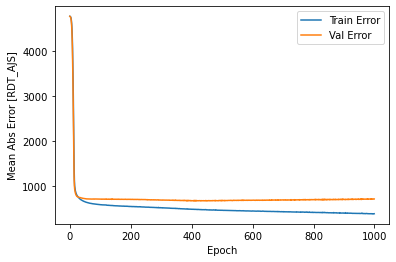

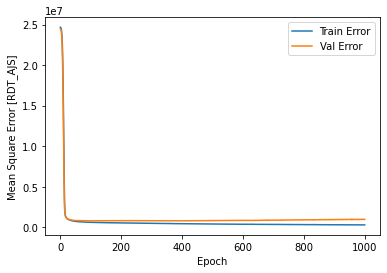

In [124]:
plot_history(history)

In [125]:
# Se incluye el parametro early stop para detener el entrenamiento en caso de no mejorar
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)


In [126]:
loss, mae, mse = model20.evaluate(normed_test_20_data, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} RDT-Ajust".format(mae))

8/8 - 0s - loss: 999256.5625 - mae: 754.6415 - mse: 999256.5625 - 32ms/epoch - 4ms/step
Testing set Mean Abs Error: 754.64 RDT-Ajust


In [127]:
normed_test_20_data

,ContMalMec_Emer_Flor,TotN_Emer_Flor,TotP_Siem_Emer,FerOrg_Emer_Flor,PROFUND_RAICES_VIVAS_RASTA,Porc_A,Rain_Accu_For,Rain_10_Freq_For,Temp_Min_Avg_Mad,Temp_Avg_Mad,MATERIAL_GENETICO_DK 234,MATERIAL_GENETICO_PAC 105,MATERIAL_GENETICO_PIONEER 30F35,METODO_COSECHA_Mecanizada,OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS,REGION_SECA_ARIDA_RASTA_SI,OBSERVA_RAICES_VIVAS_RASTA_SI,OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES,OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS,drenaje_externo_NINGUNO
695,-0.059869,-0.527550,-0.235507,-0.042295,0.014495,-0.042295,-0.331222,-0.100751,-1.230266,-1.322569,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
666,-0.059869,0.619753,-0.235507,-0.042295,0.117062,-0.042295,-0.096052,0.317985,-1.643707,-1.573926,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
63,-0.059869,-0.527550,4.305800,-0.042295,0.732464,-0.042295,1.259096,-0.519488,-0.025379,-0.184068,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
533,-0.059869,0.619753,-0.235507,-0.042295,0.835031,-0.042295,-0.016796,0.317985,-1.643707,-1.662641,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
66,-0.059869,0.046101,-0.235507,-0.042295,2.168403,-0.042295,0.231366,-0.519488,-0.379757,0.451719,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-0.059869,1.767057,-0.235507,-0.042295,1.142733,-0.042295,0.782260,0.946089,0.907817,1.057933,-0.384161,4.523641,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,-1.871307,-0.428943,0.734152
450,-0.059869,0.046101,-0.235507,-0.042295,-0.498340,-0.042295,-1.829291,-1.147592,1.262196,0.629147,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
380,-0.059869,3.488012,-0.235507,-0.042295,-0.088072,-0.042295,0.474331,0.527353,0.884192,0.865719,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,-1.871307,2.327140,0.734152
132,-0.059869,-1.101202,3.555497,-0.042295,1.553001,-0.042295,-0.249367,-0.519488,0.577064,0.717862,2.598420,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679


In [128]:
# Finalmente se realizan las predicciónes
test_predictions = model20.predict(normed_test_20_data).flatten()
test_predictions


array([6312.668 , 6616.7476, 5897.4805, 6523.3213, 5331.043 , 6475.2065,
       5320.782 , 3802.5916, 6224.2983, 4788.1343, 5032.9043, 4488.145 ,
       5135.775 , 3780.0618, 3898.8042, 3551.914 , 4082.535 , 3813.1985,
       5303.3613, 5919.029 , 6293.784 , 4843.8706, 6189.6953, 6046.7324,
       4450.161 , 4495.3887, 4235.156 , 6034.523 , 6509.225 , 5500.013 ,
       4741.0605, 4832.8955, 5487.9956, 4267.384 , 7306.4272, 5486.3154,
       6110.925 , 4158.187 , 4995.455 , 6588.8257, 6597.385 , 3392.679 ,
       5180.6577, 4567.2734, 6334.6787, 5515.4644, 4526.3906, 5119.822 ,
       6203.42  , 5384.1743, 2378.8489, 2667.4844, 6441.893 , 3940.9158,
       3818.748 , 3001.0144, 4078.9905, 4163.9927, 4115.076 , 3956.8398,
       2834.308 , 5768.67  , 7062.9976, 4372.6904, 3510.4915, 5004.7085,
       5269.9907, 6500.6934, 5160.0566, 3625.2708, 5875.4717, 2571.2124,
       5866.198 , 4659.7744, 3301.982 ,  934.1591, 4900.5283, 3725.2664,
       5852.007 , 5550.2944, 4380.782 , 3840.298 , 

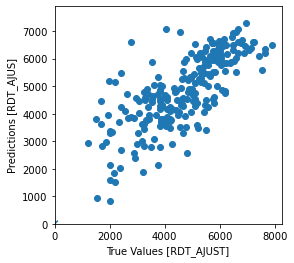

In [129]:
# Grafico valores predichos vs Valore reales
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [RDT_AJUST]')
plt.ylabel('Predictions [RDT_AJUS]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

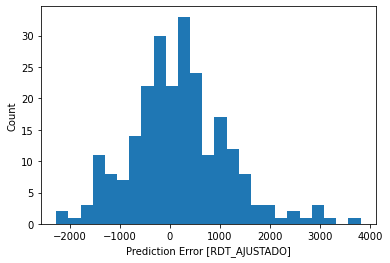

In [130]:
# Distribución de errores
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [RDT_AJUSTADO]")
_ = plt.ylabel("Count")

### Prueba con todo el conjunto de datos, sin  realizar selección de atributos

In [131]:
# Division de los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [132]:
# Dimenciones de los conjuntos de datos obtenidos
print("Conjunto de entrenamiento X_trian: ", X_train.shape)
print("Conjunto de entrenamiento variable Dependiente (Y) y_train: ", y_train.shape)
print("Conjunto de test X_test: ", X_test.shape)
print("Conjunto de test variable Dependiente (Y) y_test: ", y_test.shape)

Conjunto de entrenamiento X_trian:  (559, 188)
Conjunto de entrenamiento variable Dependiente (Y) y_train:  (559,)
Conjunto de test X_test:  (240, 188)
Conjunto de test variable Dependiente (Y) y_test:  (240,)


## Construccón del modelo

In [133]:
# Numero de caracteriticas de entrada de la red neuronal
X_train.keys()

Index(['ID_LOTE', 'DIAS_EN_EMERGER', 'DIAS_EN_EMERGER_A_FLORECER',
       'DIAS_EN_FLORECER_A_COSECHAR', 'POBLACION_20DIAS_AJT', 'ALTURA_LOT',
       'ContEnfQui_Emer_Flor', 'ContEnfQui_Flor_Cose', 'ContMalMec_Siem_Emer',
       'ContMalMec_Emer_Flor',
       ...
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO',
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO',
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR',
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA',
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan', 'd.interno_EXCESIVO',
       'd.interno_LENTO A MUY LENTO', 'd.interno_nan',
       'drenaje_externo_NINGUNO', 'drenaje_externo_nan'],
      dtype='object', length=188)

In [134]:
X_train.isna().sum().sort_values()

ID_LOTE                      0
CULT_ANT_nan                 0
DRENAJE_SI                   0
DRENAJE_nan                  0
METODO_COSECHA_Mecanizada    0
                            ..
Rain_10_Freq_Veg             0
Rhum_Avg_Veg                 0
Temp_Max_Avg_For             0
Temp_Max_Avg_Veg             0
drenaje_externo_nan          0
Length: 188, dtype: int64

In [135]:
# Normalización de los datos
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ID_LOTE,559.0,2814.983900,1095.659121,40.0,2048.5,2770.0,3793.5,4432.0
DIAS_EN_EMERGER,559.0,4.964222,1.362112,0.0,4.0,5.0,5.0,15.0
DIAS_EN_EMERGER_A_FLORECER,559.0,47.704830,5.218917,26.0,46.0,47.0,49.0,85.0
DIAS_EN_FLORECER_A_COSECHAR,559.0,80.797853,8.545279,46.0,78.0,82.0,85.0,113.0
POBLACION_20DIAS_AJT,559.0,64139.810376,7487.952996,13500.0,60000.0,62500.0,70000.0,87500.0
...,...,...,...,...,...,...,...,...
d.interno_EXCESIVO,559.0,0.001789,0.042295,0.0,0.0,0.0,0.0,1.0
d.interno_LENTO A MUY LENTO,559.0,0.432916,0.495923,0.0,0.0,0.0,1.0,1.0
d.interno_nan,559.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
drenaje_externo_NINGUNO,559.0,0.649374,0.477593,0.0,0.0,1.0,1.0,1.0


In [136]:
train_stats.loc['RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan']

count    559.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan, dtype: float64

In [137]:
# Normalización del conjunto de datos.

def norm(x):
  print(x.shape)
  return (x - train_stats['mean']) / train_stats['std']


In [138]:
# Normalizacion de los datos
normed_train_data = norm(X_train)
normed_test_data = norm(X_test)

(559, 188)
(240, 188)


In [139]:
normed_train_data

,ID_LOTE,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,...,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan,d.interno_EXCESIVO,d.interno_LENTO A MUY LENTO,d.interno_nan,drenaje_externo_NINGUNO,drenaje_externo_nan
404,-0.041056,-0.707887,-0.326664,-0.444439,-0.552863,-0.467246,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,1.143492,NaN,0.734152,NaN
522,0.679058,-0.707887,-0.135053,-0.327415,-0.285767,-0.588561,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,1.370430,NaN,NaN,-0.042295,1.143492,NaN,0.734152,NaN
748,1.337109,0.026267,-0.326664,0.608774,1.049711,-0.467246,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,1.370430,NaN,NaN,-0.042295,1.143492,NaN,-1.359679,NaN
426,0.085808,0.026267,-0.326664,1.661988,1.183259,-0.709875,-0.367336,-0.141552,-0.042295,-0.059869,...,1.770628,-0.269826,-0.728393,NaN,NaN,-0.042295,1.143492,NaN,-1.359679,NaN
41,-1.947671,1.494575,-1.093106,2.832224,-0.552863,-0.224617,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,1.143492,NaN,0.734152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.130811,1.494575,-2.051159,2.013059,-0.285767,0.381957,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,-0.872950,NaN,-1.359679,NaN
106,-0.860654,0.026267,0.056558,-1.263605,1.450355,0.624586,-0.367336,7.051884,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,1.143492,NaN,-1.359679,NaN
270,-0.462720,-0.707887,-0.518274,0.842822,-0.218993,-0.709875,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,-0.872950,NaN,0.734152,NaN
435,0.095847,-0.707887,0.056558,-0.093368,-0.285767,-0.952505,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,1.370430,NaN,NaN,-0.042295,1.143492,NaN,0.734152,NaN


In [140]:
# Visualización  de los datos normalizados
# Hay algunas columnas que presentan problemas dado que inicialmente tenian asociados muchos valores en cero.
normed_train_data.isna().sum().sort_values(ascending = False).head(40)

drenaje_externo_nan                                 559
REGION_SECA_ARIDA_RASTA_nan                         559
OBSERVA_COSTRAS_BLANCAS_RASTA_nan                   559
SITIO_EXPUESTO_SOL_RASTA_nan                        559
OBSERVA_COSTRAS_DURAS_RASTA_nan                     559
OBSERVA_MOHO_RASTA_nan                              559
OBSERVA_EROSION_RASTA_nan                           559
ESTRUCTURA_RASTA_nan                                559
MOTEADOS_MAS70cm._RASTA_nan                         559
CAP_ENDURE_RASTA_nan                                559
PEDREG_PERFIL_ROCAS_nan                             559
PEDREG_PERFIL_ROCAS_SIN ROCAS                       559
POSICION_PERFIL_RASTA_nan                           559
POSICION_PERFIL_RASTA_PIE DE UNA ELEVACION          559
TERRENO_CIRCUN_RASTA_nan                            559
ALMACENAMIENTO_FINCA_nan                            559
METODO_COSECHA_nan                                  559
DRENAJE_nan                                     

In [141]:
# Relleno de todos los nan values con 0s
normed_train_data.fillna(0, inplace=True)
normed_test_data.fillna(0,inplace=True)

In [142]:
# Verificacion
normed_train_data.isna().sum().sort_values(ascending = False).head(40)

ID_LOTE                                         0
TERRENO_CIRCUN_RASTA_nan                        0
CULT_ANT_nan                                    0
DRENAJE_SI                                      0
DRENAJE_nan                                     0
METODO_COSECHA_Mecanizada                       0
METODO_COSECHA_nan                              0
ALMACENAMIENTO_FINCA_SI                         0
ALMACENAMIENTO_FINCA_nan                        0
TERRENO_CIRCUN_RASTA_ONDULADO Y MONTANIOSO      0
TERRENO_CIRCUN_RASTA_PLANO O LLANO              0
POSICION_PERFIL_RASTA_LADERA CONVEXA            0
CULT_ANT_Pastos                                 0
POSICION_PERFIL_RASTA_LADERA PLANA              0
POSICION_PERFIL_RASTA_PIE DE UNA ELEVACION      0
POSICION_PERFIL_RASTA_PLANO                     0
POSICION_PERFIL_RASTA_PLANO CON ONDULACIONES    0
POSICION_PERFIL_RASTA_nan                       0
PEDREG_PERFIL_ROCAS_SIN ROCAS                   0
PEDREG_PERFIL_ROCAS_nan                         0


In [143]:
# Se contruye el modelo
model_completed = build_model(X_train)

In [144]:
# Resumen del modelo Completo
model_completed.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                12096     
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 18,369
Trainable params: 18,369
Non-trainable params: 0
_________________________________________________________________


In [145]:
# Prueba del modelo
example_batch = X_train[:10]
example_result = model_completed.predict(example_batch)
example_result

array([[153.47314 ],
       [113.67383 ],
       [256.5066  ],
       [398.34473 ],
       [491.29956 ],
       [417.8955  ],
       [ 44.041504],
       [ 93.78491 ],
       [ 52.283447],
       [ 77.28491 ]], dtype=float32)

In [146]:
# Entrenamiento del modelo
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model_completed.fit(
                  normed_train_data,
                  y_train,
                  epochs=EPOCHS, 
                  validation_split = 0.2, 
                  #verbose=0,
                  callbacks=[PrintDot()])

Epoch 1/1000


14/14 [==============================] - 1s 17ms/step - loss: 24672744.0000 - mae: 4773.7061 - mse: 24672744.0000 - val_loss: 24468210.0000 - val_mae: 4770.9351 - val_mse: 24468210.0000
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 24644484.0000 - mae: 4770.7334 - mse: 24644484.0000 - val_loss: 24431424.0000 - val_mae: 4767.1548 - val_mse: 24431424.0000
Epoch 3/1000
14/14 [==============================] - 0s 4ms/step - loss: 24581150.0000 - mae: 4764.2876 - mse: 24581150.0000 - val_loss: 24343804.0000 - val_mae: 4758.2827 - val_mse: 24343804.0000
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 24423922.0000 - mae: 4748.5132 - mse: 24423922.0000 - val_loss: 24125324.0000 - val_mae: 4736.4463 - val_mse: 24125324.0000
Epoch 5/1000
14/14 [==============================] - 0s 3ms/step - loss: 24051492.0000 - mae: 4710.9419 - mse: 24051492.0000 - val_loss: 23625268.0000 - val_mae: 4687.1128 - val_mse: 23625268.0000
Epoch 6/1000
14/14 [==

In [147]:
# Verificación del entrenamiento mediante el objeto historty
hist_completed = pd.DataFrame(history.history)
hist_completed['epoch'] = history.epoch
hist_completed.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,665.141846,19.410666,665.141846,1.009229e+06,802.759949,1.009229e+06,995
996,1234.821045,27.083834,1234.821045,1.011771e+06,806.981812,1.011771e+06,996
997,1391.481934,27.275126,1391.481934,1.014402e+06,803.440063,1.014402e+06,997
998,1654.175781,27.979492,1654.175781,1.010385e+06,801.343445,1.010385e+06,998
999,1928.175049,32.435566,1928.175049,1.013083e+06,806.968201,1.013083e+06,999


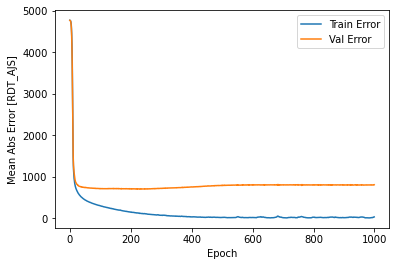

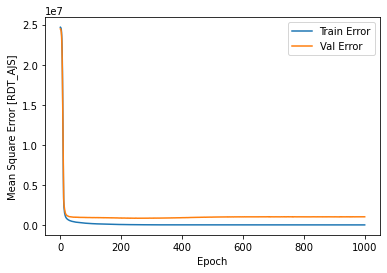

In [148]:
plot_history(history)

In [149]:
# Finalmente se realizan las predicciónes
test_predictions = model_completed.predict(normed_test_data).flatten()
test_predictions

array([8094.0596, 6852.175 , 5694.6816, 5157.193 , 4390.8555, 7076.5156,
       4407.946 , 4796.092 , 5076.3003, 3219.2263, 3243.0059, 5048.6   ,
       5854.7373, 4002.024 , 4327.4873, 3143.3823, 4570.9043, 3495.779 ,
       5996.8496, 6123.5625, 6216.8413, 5583.4414, 5608.484 , 5430.328 ,
       4604.922 , 4160.4365, 4193.868 , 4481.8555, 5912.6475, 4400.4287,
       5714.4844, 4692.0063, 5246.479 , 3834.6597, 5250.829 ,       nan,
       6762.3564, 2994.1182, 5406.326 , 5259.7646, 3756.0657, 2357.8538,
       3019.3262, 4283.8267, 7086.507 , 5830.125 , 5048.5654, 5028.0137,
       5095.959 , 5529.436 , 3901.88  , 2037.7183, 6929.351 , 2828.0603,
       4086.8254, 4088.3682, 4338.867 , 2280.3374, 2991.7683, 3046.3762,
       1128.3799, 5558.662 , 5877.599 , 5049.758 , 5011.3896, 5160.577 ,
       4527.3867, 4424.232 , 4478.716 , 5071.1987, 6065.1123, 3362.1252,
       5210.737 , 4677.0967, 2977.6296, 2065.9836, 3238.389 , 3936.3708,
       6023.757 , 6912.246 , 4922.5337, 3322.2449, 

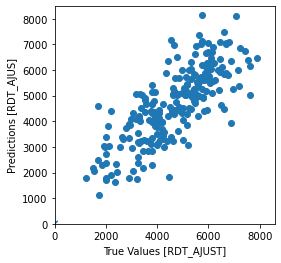

In [150]:
# Grafico valores predichos vs Valore reales
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [RDT_AJUST]')
plt.ylabel('Predictions [RDT_AJUS]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])